# ![https://www.fiap.com.br/](https://img.shields.io/badge/FIAP-red.svg?longCache=true&style=for-the-badge) MBA - Artifical Intelligence & Machine Learning
#### Cintia Akie Nakano . RM 333603 // Lennon V. Alves Dias . RM 334415 // Mateus Aguiar Florentino . RM 334444
## Técnicas de Audição Cognitiva
### Atividade 01

In [1]:
import os
import csv

INPUT_DIR = ".\\audios"
OUTPUT_DIR = ".\\"
OUTPUT_FILE_ORIGINAL = OUTPUT_DIR + "audios.csv"
OUTPUT_FILE_TREATMENT = OUTPUT_DIR + "treatment.csv"

ENCODING = "utf-8"

In [2]:
for root, dirs, files in os.walk(INPUT_DIR, topdown=False):
    with open(OUTPUT_FILE_ORIGINAL, "w", encoding=ENCODING) as fp:
        fp.write("Audio\n")
        for name in files:
            path = os.path.join(root, name)
            with open(path, "r", encoding=ENCODING) as file:
                audio = file.read()
                fp.write(audio.strip() + "\n")

In [3]:
import pandas as pd
df = pd.read_csv(OUTPUT_FILE_ORIGINAL, delimiter=";")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
Audio    41 non-null object
dtypes: object(1)
memory usage: 456.0+ bytes


In [5]:
df.head()

,Audio
0,Eu acredito que as medições oficiais ajudam au...
1,Acho que as sanções municiados por que elas pa...
2,Vão quando gente fala de internet a gente tem....
3,Acredito que sim uma vez que as posições extre...
4,Eu assistia as posições extremistas sempre exi...


In [7]:
import spacy
nlp = spacy.load('pt')

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lenno\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [8]:
stop_words = nltk.corpus.stopwords.words('portuguese')

In [9]:
stop_words = stop_words + ['n', 'sim', 'vai', 'ver', 'pode', 'tão', 'tudo', 'ne', 'porque', 'achar', 'ter', 'coisa', 'coisas', '.']

In [10]:
def lemmatizer(text):
    sent = []
    doc = nlp(text)
    for word in doc:
        if str(word) not in stop_words:
            if word.pos_ == "VERB":
                sent.append(word.lemma_)
            else:
                sent.append(word.orth_)
    return " ".join(sent)

In [11]:
df['text'] = df['Audio'].apply(str.lower)

In [12]:
df['text'] = df['text'].apply(lemmatizer)

In [13]:
from unidecode import unidecode
df['text'] = df['text'].apply(unidecode)

In [14]:
df.to_csv(OUTPUT_FILE_TREATMENT)

In [15]:
from collections import Counter
c = Counter()

In [16]:
df['text'].str.lower().str.split(" ").apply(c.update)
c.most_common(15)

[('pessoas', 86),
 ('', 67),
 ('sociais', 56),
 ('redes', 40),
 ('extremistas', 36),
 ('posicoes', 34),
 ('entao', 34),
 ('acreditar', 30),
 ('opiniao', 28),
 ('d', 27),
 ('ser', 27),
 ('extremismo', 23),
 ('internet', 22),
 ('achar', 21),
 ('aumentar', 20)]

In [17]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

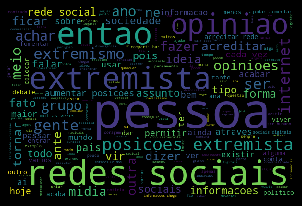

In [18]:
audio_words = ''

for val in df['text']:
    text = val.lower()
    for words in text:
        audio_words = audio_words + words

wordcloud = WordCloud(width=600, height=400).generate(audio_words)

plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()